In [1]:
## import tensorflow lib
import tensorflow as tf
# assert tf.__version__.startswith('2')
print(tf.__version__)

2.6.4


In [2]:
## check GPU usage
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2022-11-06 15:58:10.899865: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-06 15:58:11.351966: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 15:58:11.353168: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 15:58:11.490054: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

# Data preparation

In [3]:
## check the datasets
import os
datasets = '/kaggle/input/eye-gender-dataset/eye_gender_data'
train_path = os.path.join(datasets, 'train')
test_path = os.path.join(datasets, 'test')
print(train_path, test_path)
print()

for dirname, _, filenames in os.walk(datasets):
    print(dirname+"\t len file : "+str(len(filenames)))

/kaggle/input/eye-gender-dataset/eye_gender_data/train /kaggle/input/eye-gender-dataset/eye_gender_data/test

/kaggle/input/eye-gender-dataset/eye_gender_data	 len file : 3
/kaggle/input/eye-gender-dataset/eye_gender_data/test	 len file : 2305
/kaggle/input/eye-gender-dataset/eye_gender_data/train	 len file : 9220


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
train_data = pd.read_csv(os.path.join(datasets, 'Training_set.csv'))
test_data = pd.read_csv(os.path.join(datasets, 'Testing_set.csv'))

print(train_data.head())
print(test_data.head())

      filename   label
0  Image_1.jpg    male
1  Image_2.jpg  female
2  Image_3.jpg  female
3  Image_4.jpg  female
4  Image_5.jpg    male
      filename
0  Image_1.jpg
1  Image_2.jpg
2  Image_3.jpg
3  Image_4.jpg
4  Image_5.jpg


In [6]:
class_names = train_data['label'].unique().tolist()
class_names

['male', 'female']

## Check random image

Image_2.jpg
- Number of Pixels: 10092
- Shape/Dimensions: (58, 58, 3)


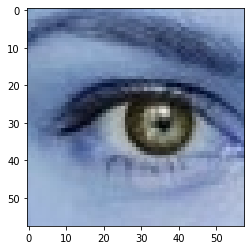

In [7]:
import cv2

file = train_data['filename'][1]
img = cv2.imread(os.path.join(train_path, file))

print(file)
print("- Number of Pixels: " + str(img.size))
print("- Shape/Dimensions: " + str(img.shape))
plt.imshow(img)

- Number of Pixels: 3364
- Shape/Dimensions: (58, 58)


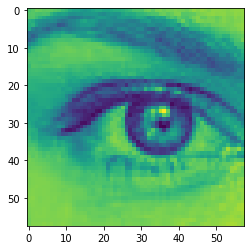

In [8]:
## change image channel to GrayScale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)
print("- Number of Pixels: " + str(gray_img.size))
print("- Shape/Dimensions: " + str(gray_img.shape))

- Number of Pixels: 1024
- Shape/Dimensions: (32, 32)


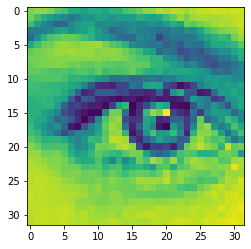

In [9]:
# reshape image 
img_re = cv2.resize(gray_img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)

plt.imshow(img_re)
print("- Number of Pixels: " + str(img_re.size))
print("- Shape/Dimensions: " + str(img_re.shape))

In [10]:
## check the pixel size of some images

for i, file in enumerate(train_data['filename']):
    if i==10:
        break
    img = cv2.imread(os.path.join(train_path, file))
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print("- Number of Pixels: " + str(gray_img.size))
    print("- Shape/Dimensions: " + str(gray_img.shape))

- Number of Pixels: 2809
- Shape/Dimensions: (53, 53)
- Number of Pixels: 3364
- Shape/Dimensions: (58, 58)
- Number of Pixels: 3481
- Shape/Dimensions: (59, 59)
- Number of Pixels: 3249
- Shape/Dimensions: (57, 57)
- Number of Pixels: 5184
- Shape/Dimensions: (72, 72)
- Number of Pixels: 3136
- Shape/Dimensions: (56, 56)
- Number of Pixels: 3025
- Shape/Dimensions: (55, 55)
- Number of Pixels: 1936
- Shape/Dimensions: (44, 44)
- Number of Pixels: 3969
- Shape/Dimensions: (63, 63)
- Number of Pixels: 3249
- Shape/Dimensions: (57, 57)


In [11]:
## change images to numpy array
import cv2
df = train_data.copy()
print(f"total train data\t: {df.shape[0]}")
img_size = 32

image = np.zeros((df.shape[0],img_size*img_size))
for i, im in enumerate(df['filename']):
    img = cv2.imread(os.path.join(train_path, im))
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_re = cv2.resize(gray_img, dsize=(img_size, img_size), interpolation=cv2.INTER_CUBIC)
    image[i] = img_re.flatten()
    
print(f"shape of train data\t: {image.shape}")

total train data	: 9220
shape of train data	: (9220, 1024)


In [12]:
# insert px image to DataFrame
gbr = pd.DataFrame(image, columns=[f'px{c+1}' for c in range(image.shape[1])])
train_data = pd.concat([df, gbr], axis = 1)
train_data.drop('filename', axis=1, inplace=True)

# encode label {0 = male; 1 = female}
train_data['label'].replace(
    ['male', 'female'], 
    [0, 1],
    inplace=True
)
train_data.to_csv('train_data.csv', index=False)

train_data

,label,px1,px2,px3,px4,px5,px6,px7,px8,px9,...,px1015,px1016,px1017,px1018,px1019,px1020,px1021,px1022,px1023,px1024
0,0,189.0,189.0,181.0,198.0,199.0,199.0,196.0,195.0,184.0,...,162.0,170.0,173.0,179.0,176.0,174.0,174.0,174.0,167.0,164.0
1,1,170.0,176.0,175.0,170.0,156.0,150.0,133.0,132.0,125.0,...,194.0,193.0,190.0,190.0,195.0,193.0,197.0,200.0,201.0,197.0
2,1,177.0,172.0,173.0,171.0,170.0,168.0,171.0,171.0,168.0,...,131.0,129.0,132.0,130.0,128.0,125.0,122.0,114.0,106.0,95.0
3,1,100.0,98.0,112.0,108.0,87.0,68.0,74.0,80.0,103.0,...,165.0,172.0,176.0,171.0,178.0,173.0,170.0,166.0,165.0,151.0
4,0,182.0,170.0,168.0,140.0,166.0,168.0,141.0,146.0,139.0,...,177.0,178.0,180.0,180.0,183.0,184.0,184.0,186.0,187.0,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9215,0,197.0,196.0,195.0,195.0,194.0,193.0,194.0,194.0,196.0,...,178.0,178.0,179.0,178.0,176.0,181.0,181.0,179.0,183.0,184.0
9216,0,158.0,171.0,164.0,175.0,163.0,152.0,148.0,142.0,130.0,...,162.0,154.0,155.0,149.0,119.0,102.0,91.0,88.0,85.0,88.0
9217,0,192.0,174.0,171.0,148.0,140.0,130.0,115.0,120.0,113.0,...,156.0,155.0,156.0,155.0,152.0,153.0,156.0,151.0,156.0,154.0
9218,0,142.0,136.0,138.0,131.0,113.0,106.0,100.0,94.0,115.0,...,138.0,158.0,162.0,155.0,156.0,147.0,142.0,155.0,172.0,175.0


Text(0.5, 1.0, '0')

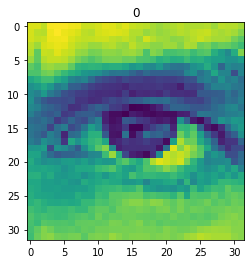

In [13]:
train_data = pd.read_csv('train_data.csv')
plt.imshow(np.array(train_data.iloc[0][1:]).reshape(img_size, img_size))
plt.title(train_data['label'][0])

# Data Preprocessing

In [14]:
## spliting datasets
from sklearn.model_selection import train_test_split

train, val = train_test_split(train_data, test_size=0.2)

train.shape, val.shape

((7376, 1025), (1844, 1025))

In [15]:
X_train = train.drop('label',axis=1).values
y_train = train['label'].values

X_val = val.drop('label',axis=1).values
y_val = val['label'].values

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((7376, 1024), (7376,), (1844, 1024), (1844,))

In [16]:
X_train = X_train.reshape(-1, img_size,  img_size, 1)
X_val = X_val.reshape(-1, img_size,  img_size, 1)

print(X_train.shape)
print(X_val.shape)

(7376, 32, 32, 1)
(1844, 32, 32, 1)


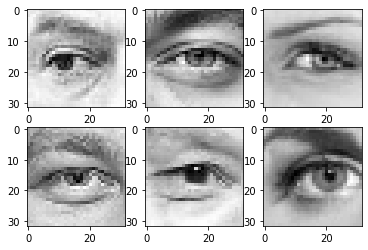

In [17]:
col, bar = 3, 2

fig,axe=plt.subplots(bar,col)
idx = 0
for i in range(bar):
    for j in range(col):
        axe[i,j].imshow(X_train[idx].reshape(img_size,img_size), cmap='gray')
        idx+=1

## Data Augmentation

In [18]:
## Scaling images
X_train = X_train.astype('float32')
X_train = X_train/255*2-1

X_val = X_val.astype('float32')
X_val = X_val/255*2-1

X_train.min(), X_train.max()

(-1.0, 1.0)

In [19]:
## Heavier Augmentation
INPUT_SHAPE = (img_size, img_size, 1)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=INPUT_SHAPE),
    tf.keras.layers.experimental.preprocessing.RandomRotation((-0.2, 0.3))
])

2022-11-06 15:58:55.734030: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 15:58:55.734967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 15:58:55.735740: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 15:58:55.736461: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 15:58:55.737288: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

(32, 32, 1)
(1, 32, 32, 1)


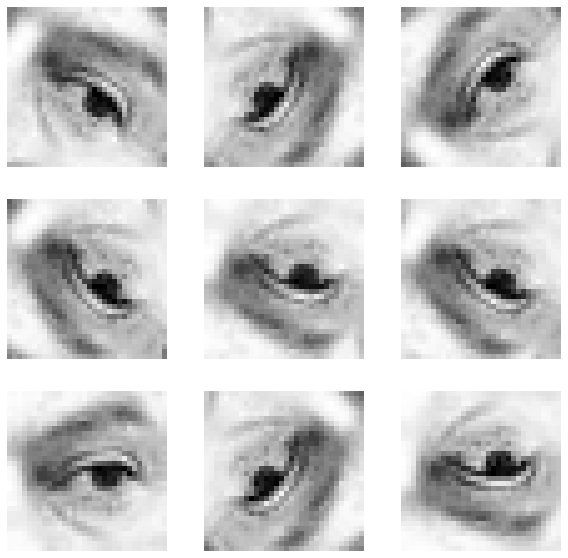

In [20]:
## Check augmented image

image = X_train[0]
print(image.shape)
image = tf.expand_dims(X_train[0], 0)
print(image.shape)

plt.figure(figsize = (10,10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_image[0], cmap='gray')
    plt.axis("off")

# Training Model

In [21]:
## Build Model Architecture

# define sequential model
model = tf.keras.models.Sequential()

# define data augmentation
model.add(data_augmentation)

# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(
    filters=16, kernel_size=(3, 3), strides=(1, 1),
    activation='relu', padding='valid'
))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(3, 3), strides=(1, 1),
    activation='relu', padding='valid'
))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))


# view model layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 256)              

In [22]:
## setting model parameters

EPOCHS = 30
batch_size = 15
opt = 'adam'
loss = 'sparse_categorical_crossentropy'

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,
    restore_best_weights=True,
    verbose=1)

In [23]:
# compile model
model.compile(
    optimizer = opt,
    loss = loss,
    metrics=['accuracy']
)

# fit/train model
with tf.device('/gpu:0'):
    history = model.fit(
        X_train, y_train,
        validation_data = (X_val, y_val),
        batch_size = batch_size,
        callbacks = [es_callback],
        validation_split = 0.2, 
        epochs = EPOCHS,
        verbose = 1
    )

2022-11-06 15:58:57.303111: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-11-06 15:58:59.468627: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


394/394 [==============================] - 12s 7ms/step - loss: 0.6554 - accuracy: 0.6107 - val_loss: 0.5561 - val_accuracy: 0.7310
Epoch 2/30
394/394 [==============================] - 2s 5ms/step - loss: 0.5817 - accuracy: 0.6964 - val_loss: 0.5211 - val_accuracy: 0.7642
Epoch 3/30
394/394 [==============================] - 3s 7ms/step - loss: 0.5280 - accuracy: 0.7402 - val_loss: 0.4665 - val_accuracy: 0.7873
Epoch 4/30
394/394 [==============================] - 2s 5ms/step - loss: 0.4994 - accuracy: 0.7593 - val_loss: 0.4825 - val_accuracy: 0.7636
Epoch 5/30
394/394 [==============================] - 2s 5ms/step - loss: 0.4750 - accuracy: 0.7761 - val_loss: 0.4399 - val_accuracy: 0.7988
Epoch 6/30
394/394 [==============================] - 2s 5ms/step - loss: 0.4630 - accuracy: 0.7866 - val_loss: 0.4950 - val_accuracy: 0.7561
Epoch 7/30
394/394 [==============================] - 2s 5ms/step - loss: 0.4392 - accuracy: 0.8020 - val_loss: 0.4241 - val_accuracy: 0.8089
Epoch 8/30
394/3

In [24]:
## model evaluate

loss, acc = model.evaluate(X_val, y_val)
print(f"valid accuracy: {acc} \nvalid loss: {loss}")

58/58 [==============================] - 0s 3ms/step - loss: 0.2839 - accuracy: 0.8839
valid accuracy: 0.8839479684829712 
valid loss: 0.28386664390563965


# Model Evaluation

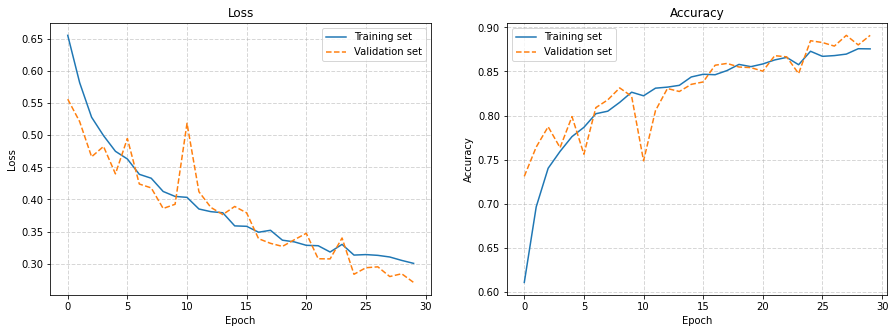

In [25]:
## Plot accuracy dan Loss

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss, label='Training set')
plt.plot(val_loss, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(acc, label='Training set')
plt.plot(val_acc, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.show()

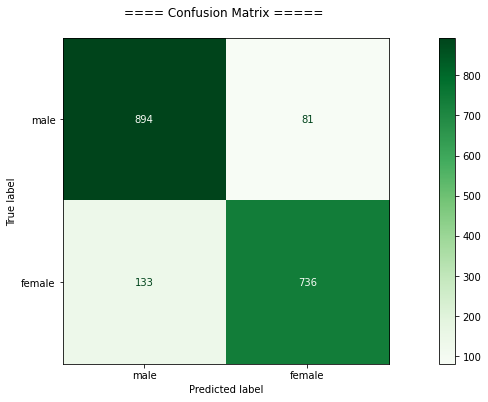


=============== Classification Report ================
              precision    recall  f1-score   support

        male       0.87      0.92      0.89       975
      female       0.90      0.85      0.87       869

    accuracy                           0.88      1844
   macro avg       0.89      0.88      0.88      1844
weighted avg       0.88      0.88      0.88      1844



In [26]:
## Plot Confusion Matrix dan Classification Report

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

Y_pred = model.predict(X_val)
y_pred = np.argmax(Y_pred, axis=1)

labels_list = class_names


fig, ax = plt.subplots(figsize=(18, 6))
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_list)
disp.plot(cmap=plt.cm.Greens, ax=ax)
plt.title("==== Confusion Matrix ===== \n")
plt.show()


print("\n=============== Classification Report ================")
print(classification_report(y_val, y_pred, target_names=labels_list))

# Predict Test Dataset

In [27]:
test_data

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg
...,...
2300,Image_2301.jpg
2301,Image_2302.jpg
2302,Image_2303.jpg
2303,Image_2304.jpg


In [28]:
## change images to numpy array
test_df = test_data.copy()
print(f"total train data\t: {test_df.shape[0]}")
img_size = 32

image = np.zeros((test_df.shape[0],img_size*img_size))
for i, im in enumerate(test_df['filename']):
    img = cv2.imread(os.path.join(test_path, im))
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_re = cv2.resize(gray_img, dsize=(img_size, img_size), interpolation=cv2.INTER_CUBIC)
    image[i] = img_re.flatten()
    
print(f"shape of train data\t: {image.shape}")

total train data	: 2305
shape of train data	: (2305, 1024)


In [29]:
img = image.reshape(-1, img_size,  img_size, 1)
img.shape

(2305, 32, 32, 1)

In [30]:
pred_prob = model.predict(img)
pred_label = np.argmax(pred_prob, axis=1)

pred_label.shape, np.unique(pred_label, return_counts=True)

((2305,), (array([0, 1]), array([ 556, 1749])))

In [31]:
test_data['label'] = pred_label
test_data['label'].replace(
    [0, 1],
    ['male', 'female'], 
    inplace=True
)
test_data['proba'] = np.max(pred_prob, axis=-1)
train_data.to_csv('test_data.csv', index=False)
pd.DataFrame(test_data['label']).to_csv('Submition.csv', index=False)

test_data

,filename,label,proba
0,Image_1.jpg,male,0.999864
1,Image_2.jpg,male,1.000000
2,Image_3.jpg,female,1.000000
3,Image_4.jpg,female,1.000000
4,Image_5.jpg,male,1.000000
...,...,...,...
2300,Image_2301.jpg,female,1.000000
2301,Image_2302.jpg,female,1.000000
2302,Image_2303.jpg,male,1.000000
2303,Image_2304.jpg,male,1.000000


(2305, 32, 32, 1)


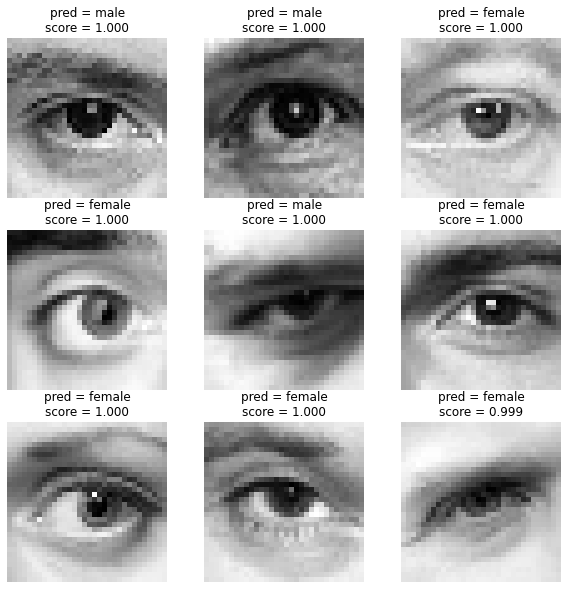

In [32]:
## Check image prediction

image = img
lb = test_data['label']
prob = test_data['proba']

print(image.shape)
# image = tf.expand_dims(X_train[0], 0)
# print(image.shape)

plt.figure(figsize = (10,10))
for i in range(9):
#     augmented_image = data_augmentation(image)
    ax = plt.subplot(3,3, i+1)
    plt.imshow(image[i], cmap='gray')
    plt.title(
        label=f"pred = {lb[i]}\nscore = {prob[i]:.3f}",
        fontdict={'fontsize':12}
    )
    plt.axis("off")